In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#import data
data = pd.read_csv("D:\GIT1\Machine-Learning\K Means Clustering\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#select the numerical columns for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [20]:
#Standardiing data with minmaxScaler
scaler = MinMaxScaler()

#fit and transform the data using MinMaxScalar
X_scaled = scaler.fit_transform(X)

In [21]:
#Specify number of clusters
k= 4

#create and fit the Kmodel on the scaled data
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(X_scaled)

c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

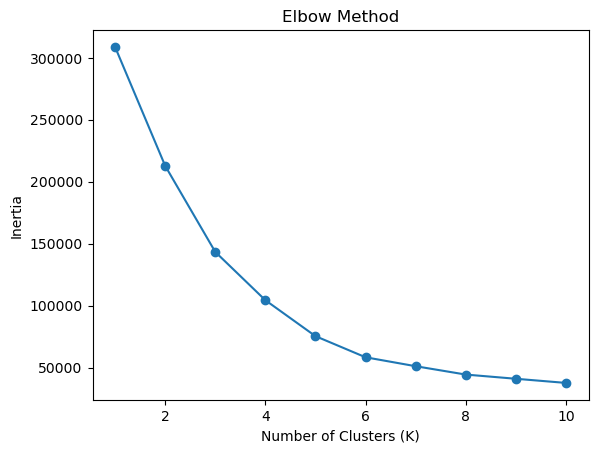

In [22]:
#Determining the optimal number of K in the Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [23]:
# Add cluster labels to the original DataFrame.
data['Cluster'] = kmeans.labels_

# Get cluster centroids in the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the cluster centroids in the original scale
print("Cluster Centroids (Original Scale):")
print(pd.DataFrame(centroids, columns=X.columns))


Cluster Centroids (Original Scale):
           Age  Annual Income (k$)  Spending Score (1-100)
0  2197.666667         9775.000000             1430.166667
1  1308.095238         3140.523810             7864.333333
2  1705.636364        13213.181818             8108.272727
3  2438.689655         6893.275862             4654.310345
4  2566.000000         3126.000000             1205.000000
5  1772.133333         3935.266667             4188.866667
6  2150.000000        13398.400000             2157.000000
7  1722.857143         9535.357143             8026.500000
8  1238.000000         7245.846154             4818.076923
9  3341.272727         6486.545455             4963.363636


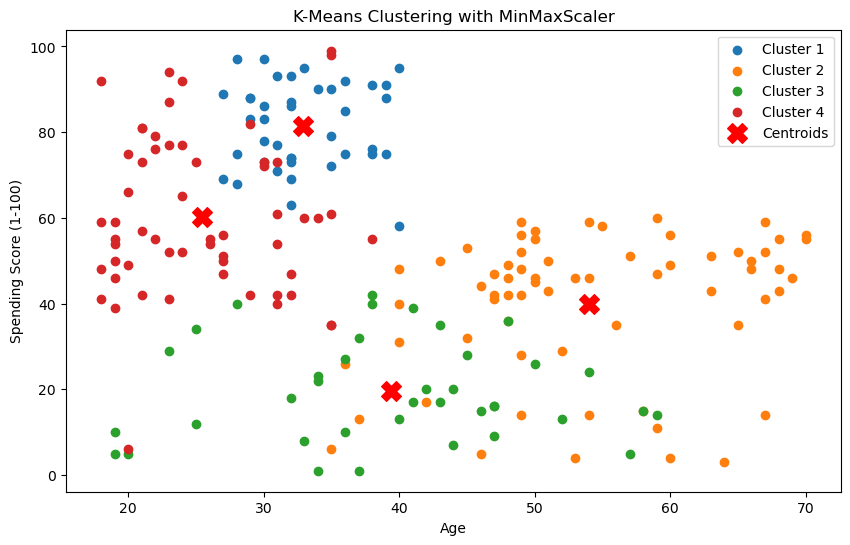

In [14]:
# Plot the data points and centroids
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(data[data['Cluster'] == i]['Age'], data[data['Cluster'] == i]['Spending Score (1-100)'], label=f'Cluster {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with MinMaxScaler')
plt.legend()
plt.show()